In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [180]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [181]:
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [182]:
df_train.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [183]:
import missingno as msno

<AxesSubplot:>

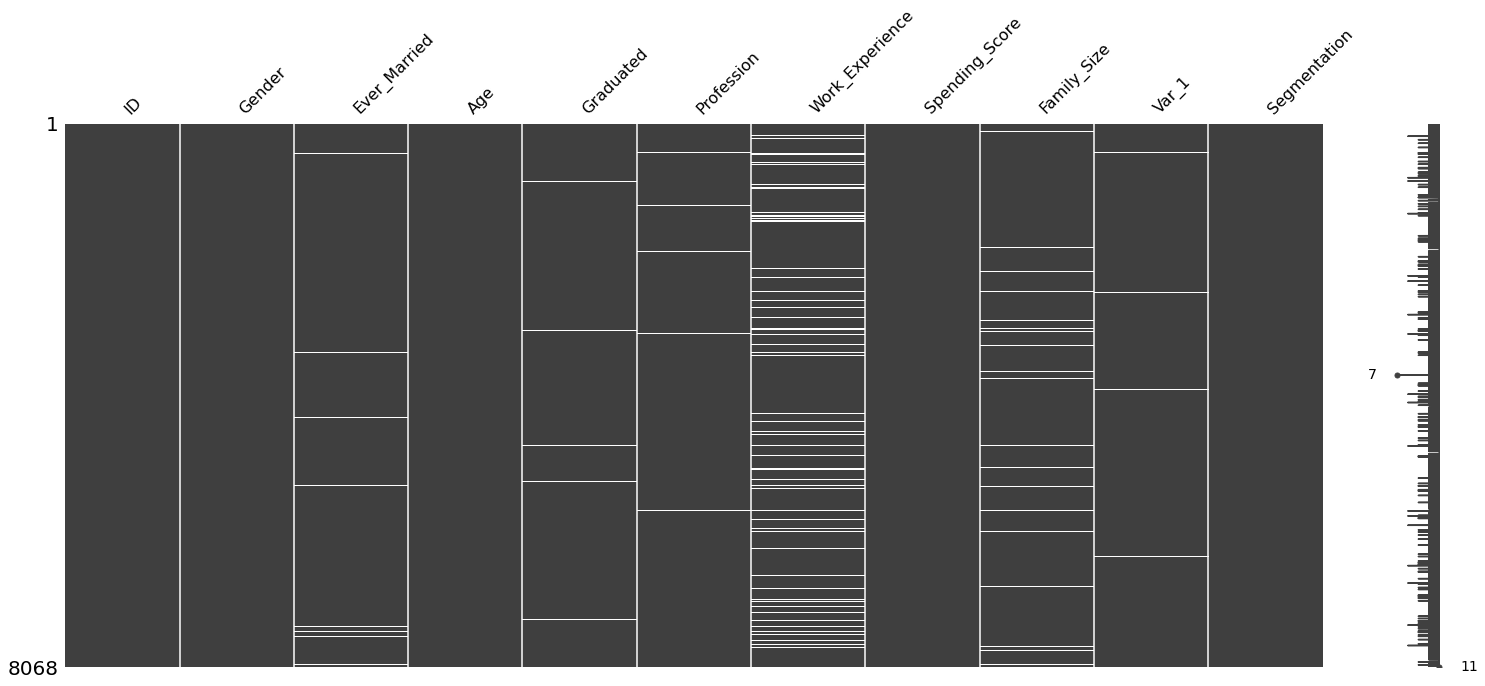

In [184]:
msno.matrix(df_train)

In [185]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [186]:
df_train.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [187]:
df_train['Work_Experience'] = df_train['Work_Experience'].fillna(df_train['Work_Experience'].mean())

In [188]:
df_train = df_train.dropna()

In [189]:
import seaborn as sns

In [192]:
df_train['Segmentation'].value_counts()

D    1990
C    1860
A    1787
B    1739
Name: Segmentation, dtype: int64

In [193]:
for index, row in df_train.iterrows():
    if (pd.isna(row['Ever_Married']) == True and row['Family_Size'] >= 2):
        df_train['Ever_Married'][index] = 'Yes'
    elif pd.isna(row['Ever_Married']) == True:
        df_train['Ever_Married'][index] = 'No'

In [194]:
for index, row in df_train.iterrows():
    if (pd.isna(row['Graduated']) == True and row['Profession'] != 'Homemaker'):
        df_train['Graduated'][index] = 'Yes'
    elif pd.isna(row['Graduated']) == True:
        df_train['Graduated'][index] = 'No'

In [195]:
df_train['Profession'] = df_train['Profession'].fillna('Homemaker')
df_train['Work_Experience'] = df_train['Work_Experience'].fillna(1.0)
df_train['Family_Size'] = df_train['Family_Size'].fillna(1.0)
df_train = df_train.dropna()

<AxesSubplot:>

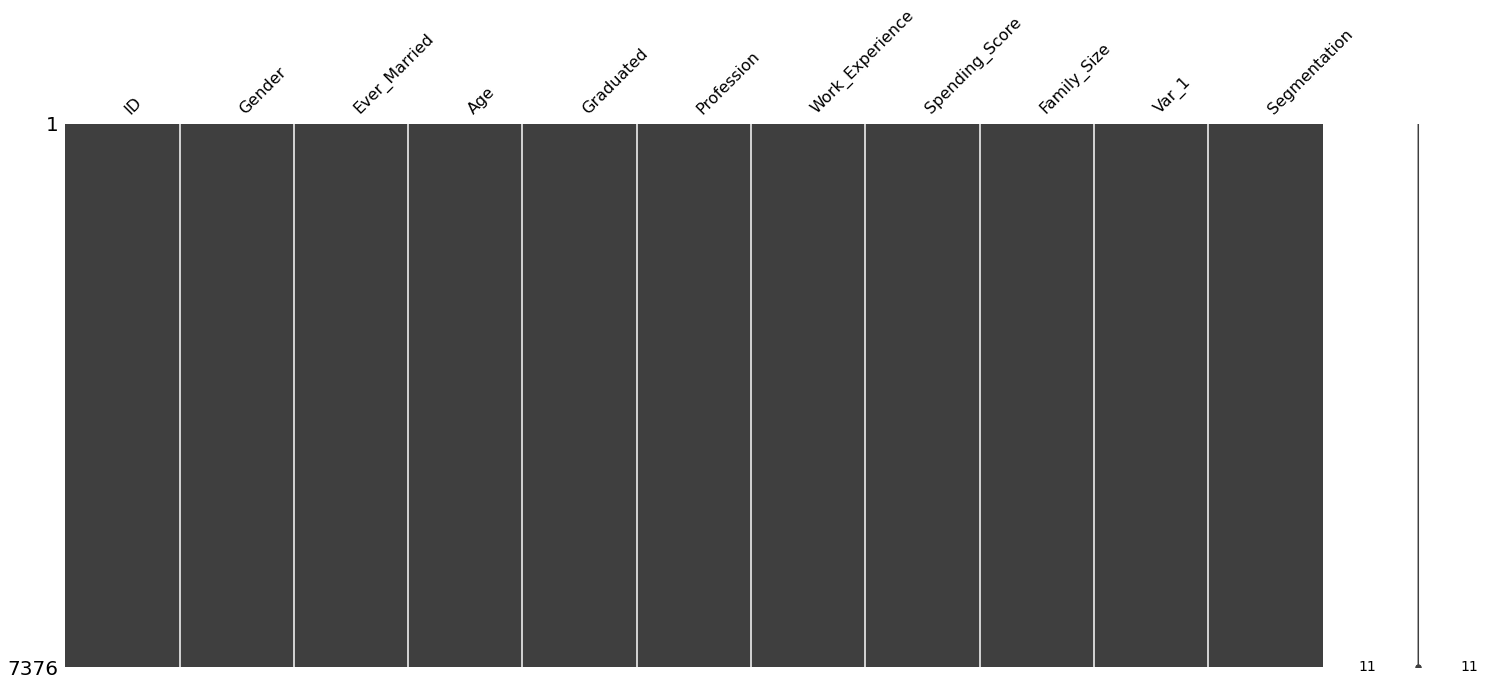

In [196]:
msno.matrix(df_train)

In [197]:
import seaborn as sns

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'ID'),
  Text(0, 1.5, 'Age'),
  Text(0, 2.5, 'Work_Experience'),
  Text(0, 3.5, 'Family_Size')])

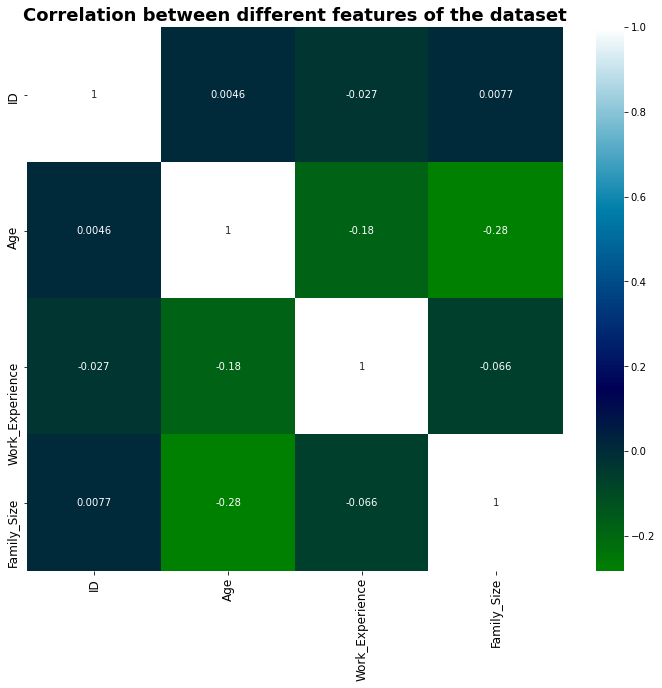

In [198]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df_train.corr(), cmap = 'ocean', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12)

In [199]:
categorical = ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1', 'Segmentation']

df_copy = df_train.copy()

for column in categorical:
    label_encoder.fit(df_copy[column])
    df_copy[column] = label_encoder.transform(df_copy[column])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'ID'),
  Text(0, 1.5, 'Gender'),
  Text(0, 2.5, 'Ever_Married'),
  Text(0, 3.5, 'Age'),
  Text(0, 4.5, 'Graduated'),
  Text(0, 5.5, 'Profession'),
  Text(0, 6.5, 'Work_Experience'),
  Text(0, 7.5, 'Spending_Score'),
  Text(0, 8.5, 'Family_Size'),
  Text(0, 9.5, 'Var_1'),
  Text(0, 10.5, 'Segmentation')])

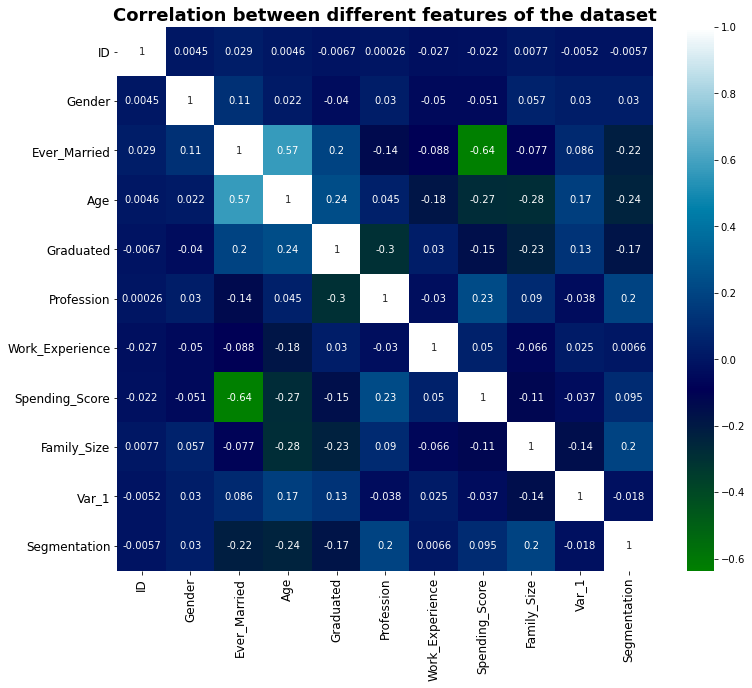

In [200]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df_copy.corr(), cmap = 'ocean', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12)

In [201]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder

In [209]:
X = df_train.drop(columns=['Segmentation'],axis=1)
Y = df_train[['Segmentation']]


In [210]:
X.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6


In [211]:
Y.head()

,Segmentation
0,D
1,A
2,B
3,B
4,A


In [225]:
categorical = ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1']

for column in categorical:
    label_encoder.fit(X[column])
    X[column] = label_encoder.transform(X[column])

In [226]:
X.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1,0,22,0,5,1.000000,2,4.0,3
1,462643,0,1,38,1,2,2.641663,0,3.0,3
2,466315,0,1,67,1,2,1.000000,2,1.0,5
3,461735,1,1,67,1,7,0.000000,1,2.0,5
4,462669,0,1,40,1,3,2.641663,1,6.0,5


In [227]:
label_encoder.fit(Y)
Y = label_encoder.transform(Y)

In [228]:
Y

array([3, 0, 1, ..., 3, 1, 1])

(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'ID'),
  Text(0, 1.5, 'Age'),
  Text(0, 2.5, 'Work_Experience'),
  Text(0, 3.5, 'Family_Size')])

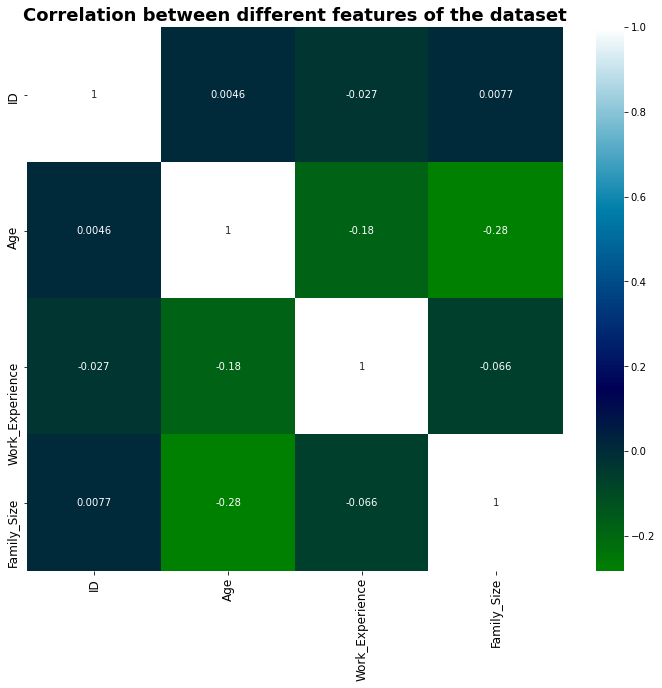

In [215]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(X.corr(), cmap = 'ocean', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [144]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
param_grid_lr = {'C' : [0.001, 0.01, 0.1, 1.0]}
gridsearch_lr = GridSearchCV(lr,param_grid = param_grid_lr, cv = 3).fit(X_train,y_train)
gridsearch_lr.best_score_

0.2744067379651672

In [145]:
y_train_pred  = gridsearch_lr.predict(X_train)
y_train_prob = gridsearch_lr.predict_proba(X_train)[:,1]

print("Confusion Matrix for Train : \n", confusion_matrix(y_train, y_train_pred))
print("Accuracy Score for Train : ", accuracy_score(y_train, y_train_pred))

print("Test Results \n")
y_test_pred  = gridsearch_lr.predict(X_test)
y_test_prob = gridsearch_lr.predict_proba(X_test)[:,1]
print("Confusion Matrix for Test : \n", confusion_matrix(y_test, y_test_pred))
print("Accuracy Score for Test : ", accuracy_score(y_test, y_test_pred))

Confusion Matrix for Train : 
 [[   0    0    0 1433]
 [   0    0    0 1385]
 [   0    0    0 1463]
 [   0    0    0 1619]]
Accuracy Score for Train :  0.27440677966101695
Test Results 

Confusion Matrix for Test : 
 [[  0   0   0 354]
 [  0   0   0 354]
 [  0   0   0 397]
 [  0   0   0 371]]
Accuracy Score for Test :  0.2513550135501355


In [146]:
rfc = RandomForestClassifier()
param_grid_rfc = {    'n_estimators': [100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
gridsearch_rfc = GridSearchCV(rfc,param_grid = param_grid_rfc, cv = 3).fit(X_train,y_train)
gridsearch_rfc.best_score_

0.5408474312421486

In [154]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model_parameters = {'learning_rate' : [0.01, 0.05, 0.1],
                   'max_depth' : [3, 4, 5],
                   'n_estimators' : [100, 150, 200],
                   'max_features' : [5, 7, 9]}
gridsearch_model_gbc = GridSearchCV(gbc, param_grid = model_parameters, cv= 5).fit(X_train,y_train)
# Accuracy
predict_gbc = gridsearch_model_gbc.predict(X_test)
accu_gbc = accuracy_score(y_test, predict_gbc)
print(accu_gbc)

0.5494579945799458


In [155]:
gridsearch_model_gbc.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'max_features': 7, 'n_estimators': 200}

In [156]:
df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


<AxesSubplot:>

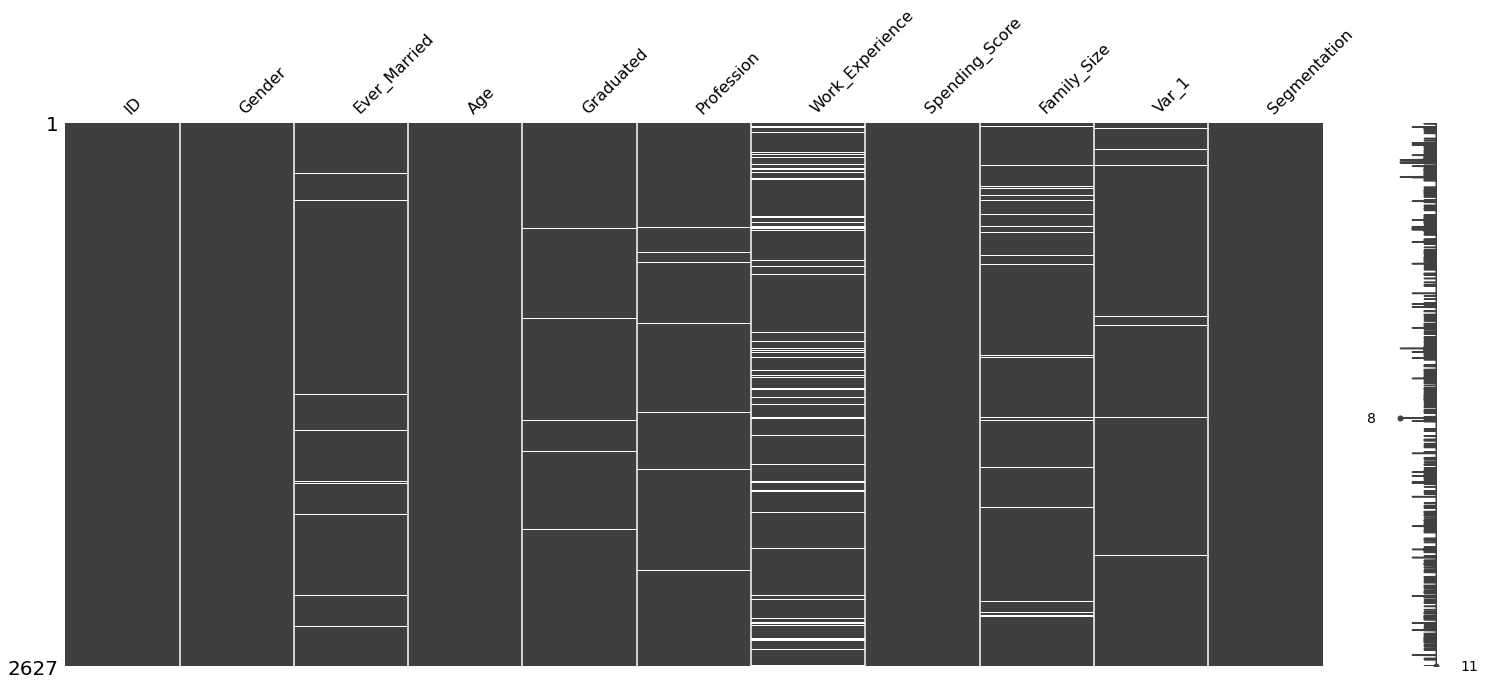

In [157]:
msno.matrix(df_test)

In [216]:
for index, row in df_test.iterrows():
    if (pd.isna(row['Ever_Married']) == True and row['Family_Size'] >= 2):
        df_test['Ever_Married'][index] = 'Yes'
    elif pd.isna(row['Ever_Married']) == True:
        df_test['Ever_Married'][index] = 'No'
        
for index, row in df_train.iterrows():
    if (pd.isna(row['Graduated']) == True and row['Profession'] != 'Homemaker'):
        df_test['Graduated'][index] = 'Yes'
    elif pd.isna(row['Graduated']) == True:
        df_test['Graduated'][index] = 'No'
        
df_test['Profession'] = df_test['Profession'].fillna('Homemaker')
df_test['Work_Experience'] = df_test['Work_Experience'].fillna(1.0)
df_test['Family_Size'] = df_test['Family_Size'].fillna(1.0)
df_test = df_test.dropna()

<AxesSubplot:>

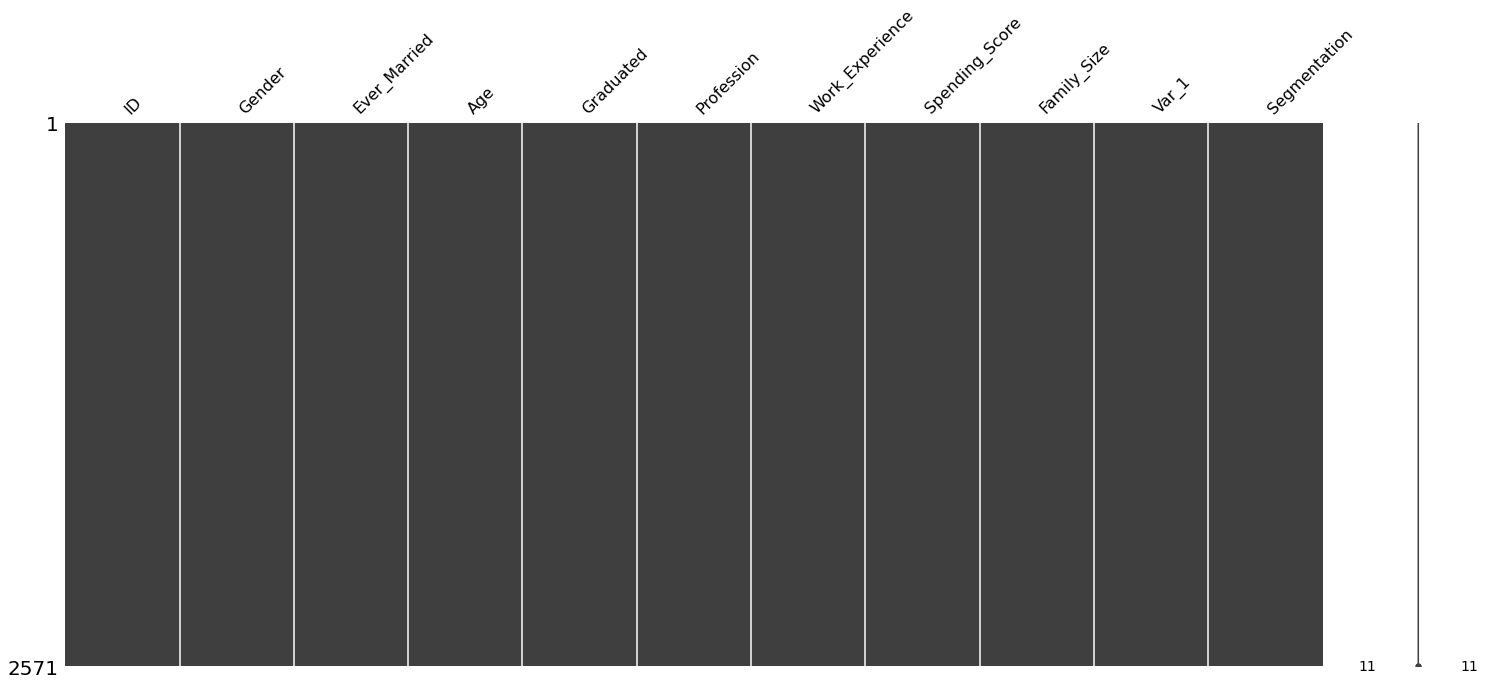

In [217]:
msno.matrix(df_test)

In [218]:
categorical = ['Gender','Ever_Married','Graduated','Profession','Spending_Score','Var_1','Segmentation']

for column in categorical:
    label_encoder.fit(df_test[column])
    df_test[column] = label_encoder.transform(df_test[column])

In [219]:
X_df_test = df_test.drop(columns=['Segmentation'],axis=1)
Y_df_test = df_test[['Segmentation']]

In [229]:
final_model = GradientBoostingClassifier(learning_rate=0.05, max_depth=4,max_features=7,n_estimators=200)
final_model.fit(X,Y)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features=7,
                           n_estimators=200)

In [230]:
# Accuracy
predict_final = final_model.predict(X_df_test)

In [231]:
print("Confusion Matrix for Test : \n", confusion_matrix(Y_df_test, predict_final))
print("Accuracy Score for Test : ", accuracy_score(Y_df_test, predict_final))

Confusion Matrix for Test : 
 [[238 169 162 259]
 [147 122 141 128]
 [125 111 150  74]
 [162 112 134 337]]
Accuracy Score for Test :  0.3294437961882536


In [232]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model_parameters = {'learning_rate' : [0.01, 0.05, 0.1],
                   'max_depth' : [3, 4, 5],
                   'n_estimators' : [100, 150, 200],
                   'max_features' : [5, 7, 9]}
gridsearch_model_gbc = GridSearchCV(gbc, param_grid = model_parameters, cv= 5).fit(X,Y)
# Accuracy
predict_final = gridsearch_model_gbc.predict(X_df_test)
print("Confusion Matrix for Test : \n", confusion_matrix(Y_df_test, predict_final))
print("Accuracy Score for Test : ", accuracy_score(Y_df_test, predict_final))

Confusion Matrix for Test : 
 [[235 180 171 242]
 [147 132 134 125]
 [126 106 151  77]
 [161 112 139 333]]
Accuracy Score for Test :  0.3309996110462855
